# Estimate neuron timing

This notebook shows how to estimate the delay and amplitude response between primary brain regions for a given neuron.  In general, the delay within a compartment tends to be isopotential meaning a region to region response matrix is a reasonable characterization of the output response of a neuron.

The electrical simulation uses a simple linear passive model using a network of resistors and capacitors based on a skeleton representation of the neuron.  Users can specify specific membrane resistance and capacitance values and cytoplasm resitance.

In [1]:
from neuprint import Client
client = Client("neuprint.janelia.org", dataset="hemibrain:v1.0.1")

### Setup neuron model

* create neuprint client using the public hemibrain dataset
* build a neuron spice model for a given body id

In [55]:
# simulate a PEG neuron (same type as in hemibrain paper)
from neuprint import NeuronModel
m = NeuronModel(449438847)

### Run simulation for the given neuron

Specify the number of inputs per brain region (randomly selected) which will be tested.  A current is injected at each input site one at a time and delay and amplitude response is measured.

In [56]:
res = nm.simulate(2)

### Examine the response results

compute_region_delay_matrix reports the delay between regions where the row index is the input brain region and the column names represent the output region.  A delay (ms) and amplitude (mV) are returned.  They are averages over all the response for a given region input-output pair.

Note: the results to synapses that are not in brain regions ("none") are shown for completeness.  But those output responses are not necessarily co-located and cannot be treated as an ROI.

In [57]:
delay, amp = res.compute_region_delay_matrix()

In [58]:
# delay matrix in ms
delay

,EB,LAL(R),PB,none
CRE(R),2.074233,0.427321,3.208169,2.539196
EB,1.272199,2.457093,3.166389,2.483819
FB,1.773313,2.231447,1.533720,0.664264
LAL(R),2.417689,0.307791,3.533629,2.869227
PB,3.159437,3.566067,0.418263,0.730713
none,2.569125,2.990450,0.686466,0.146879


In [59]:
# amplitude in mV
amp

,EB,LAL(R),PB,none
CRE(R),0.153407,0.489385,0.122230,0.134334
EB,0.183613,0.145670,0.123220,0.135669
FB,0.155724,0.145724,0.161921,0.184782
LAL(R),0.145214,0.819823,0.116035,0.127469
PB,0.123189,0.116393,0.429269,0.261877
none,0.134779,0.127127,0.279520,0.314567


### Plot response from one brain region to others

Each dot represents the response from each input from the specified input region (LAL(R) here) to every output in the neuron (each output brain region is indicated).

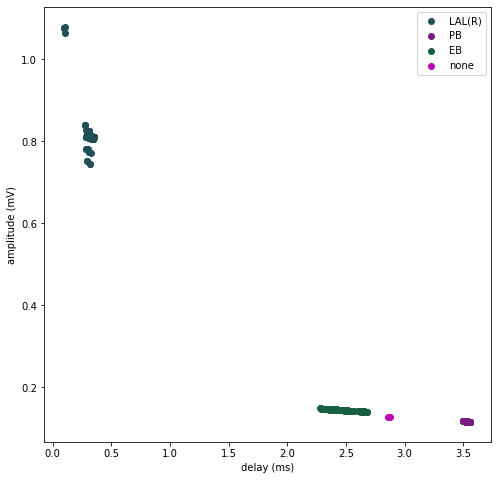

In [62]:
res.plot_response_from_region("LAL(R)")